1\. Write a function that converts number representation (bin<->dec<->hex)

In [98]:
# This converts any integer 'number' to a representation according to a list of symbols 'base' and stores it in 'result'
def to_base(number, base, result):
    size = len(base)
    if number < 0:
        result.append("-")
        number *= -1
    if number >= size:
        to_base(number / size, base, result)
    result.append(base[int(number % size)])

arr = []
operands = [8, -15, 1234, -14100]
bases = {"bin": "01", "dec": "0123456789", "hex": "0123456789ABCDEF"}
for num in operands:
    for key, value in bases.items():
        to_base(num, value, arr)
        print(num, "to base", key, "->", end=" ")
        print(*arr, sep="")
        arr.clear()

8 to base bin -> 1000
8 to base dec -> 8
8 to base hex -> 8
-15 to base bin -> -1111
-15 to base dec -> -15
-15 to base hex -> -F
1234 to base bin -> 10011010010
1234 to base dec -> 1234
1234 to base hex -> 4D2
-14100 to base bin -> -11011100010100
-14100 to base dec -> -14100
-14100 to base hex -> -3714


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various
bits as sign, mantissa and exponent)

In [99]:
# A 32-bit word is a string of 2 to 4 chars, because each char occupies 1 to 2 bytes in memory.
# In particular, the ascii chars occupy 1 byte, while some utf-8 chars occupy 2 bytes or even 6 bytes.
# To convert the word bits into a floating point we need to access the raw bytes via bytearray() and check that it's
#   indeed a 32-bit word.
def word_to_float(word):
    bin_arr = 0
    byte_array = bytearray(word, 'utf-8')
    if len(byte_array) != 4:
        return 0
    for i in range(len(byte_array)):
        bin_arr += byte_array[i]
        if i != len(byte_array) - 1:
            bin_arr = bin_arr << 8
    sign = bin_arr >> 31
    print("\tSign:", format(sign, '01b'), "=>", (sign == 1) * "-" + (sign == 0) * "+")
    exponent = (bin_arr >> 23) & ~(1 << 8)
    print("\tExponent:", format(exponent, '08b'), "=>", exponent - 127)
    mantissa = bin_arr & ~((2 ** 9 - 1) << 23)
    print("\tMantissa:", format(mantissa, '023b'), "=>", end= " ")
    mantissa_bin = []
    to_base(mantissa, "01", mantissa_bin)
    mantissa = 1.0
    for element, i in zip(mantissa_bin, range(-1,-23,-1)):
        mantissa += (element == '1') * (2 ** i)
    print(mantissa)
    return ((sign == 0) - (sign == 1)) * mantissa * (2 ** (exponent - 127))

# Run word_to_float on several examples
for example in ["Anda", " oh!", "ññ", "🐒", "⚠️"]:
    print("Converting", "'", example, "'", "into a float.\n\tWord bits: ", end="")
    for plot in bytearray(example, 'utf-8'):
        print(format(plot, '08b'), end=" ")
    print()
    w_to_f = word_to_float(example)
    if w_to_f == 0:
        print("Couldn't convert '", example, "' into a float. Size is not 32 bits.", end="\n\n")
    else:
        print("'", example,"' bits into a float =>", w_to_f, end="\n\n")

Converting ' Anda ' into a float.
	Word bits: 01000001 01101110 01100100 01100001 
	Sign: 0 => +
	Exponent: 10000010 => 3
	Mantissa: 11011100110010001100001 => 1.8624382019042969
' Anda ' bits into a float => 14.899505615234375

Converting '  oh! ' into a float.
	Word bits: 00100000 01101111 01101000 00100001 
	Sign: 0 => +
	Exponent: 01000000 => -63
	Mantissa: 11011110110100000100001 => 1.8703651428222656
'  oh! ' bits into a float => 2.0278539511890612e-19

Converting ' ññ ' into a float.
	Word bits: 11000011 10110001 11000011 10110001 
	Sign: 1 => -
	Exponent: 10000111 => 8
	Mantissa: 01100011100001110110001 => 1.777569055557251
' ññ ' bits into a float => -455.05767822265625

Converting ' 🐒 ' into a float.
	Word bits: 11110000 10011111 10010000 10010010 
	Sign: 1 => -
	Exponent: 11100001 => 98
	Mantissa: 00111111001000010010010 => 1.9863977432250977
' 🐒 ' bits into a float => -6.2951457287282384e+29

Converting ' ⚠️ ' into a float.
	Word bits: 11100010 10011010 10100000 11101111 10

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [100]:
maxf = 1.0
minf = 1.0
overflow = False
underflow = False
while not (overflow and underflow):
    maxf *= 2
    minf /= 2
    if not overflow and maxf * 2 == float('inf'):
        print("Max float:", maxf)
        overflow = True
    # Why does it work? The float has finite precision, yet the equality == 0 holds here.
    if not underflow and minf / 2 == float(0):
        print("Min float:", minf)
        underflow = True

Max float: 8.98846567431158e+307
Min float: 5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [101]:
testf = 1.0
addf = 1.0
while True:
    testf, addf = testf + addf, addf / 2
    if testf + addf == testf:
        print("Precision is:", addf * 2)
        break

Precision is: 2.220446049250313e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the
quadratic equation $ax^2+bx+c=0$ using the standard formula:
$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again
find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [102]:
def sqrts(a, b, c):
    root = (b ** 2.0 - 4.0 * a * c) ** 0.5
    return [(-b + root) / (2 * a), (-b - root) / (2 * a)]


def sqrts_2(a, b, c):
    root = (b ** 2.0 - 4.0 * a * c) ** 0.5
    return [(-b + root) * (-b + root) / (2 * a * (-b + root)), (-b - root) * (-b - root) / (2 * a * (-b - root))]


print(sqrts(0.001, 1000, 0.001))
print(sqrts_2(0.001, 1000, 0.001))

[-9.999894245993346e-07, -999999.999999]
[-9.999894245993346e-07, -999999.999999]


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

Derivate at x = 1 with p = 1e-06:	1.0000009999177333
Derivate at x = 1 with p = 1e-08:	1.0000000039225287
Derivate at x = 1 with p = 1e-10:	1.000000082840371
Derivate at x = 1 with p = 1e-12:	1.0000889005833413


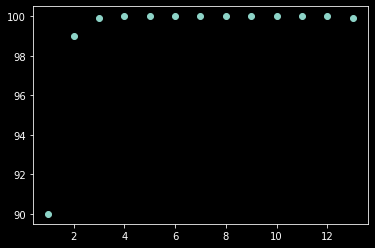

In [135]:
import math as m
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def foo(x):
    return x * (x - 1)


def derivative(function, point, precision):
    return (function(point + precision) - function(point)) / precision


a = []
for p in range(1, 14, 1):
    result = derivative(foo, 1.0, 10.0 ** -p)
    if p == 6 or p == 8 or p ==  10 or p == 12:
        print(f"Derivate at x = 1 with p = {10 ** -p:.0e}:\t{result}")
    #print(f"Accuracy at x = 1 with p = {10 ** -p:.0e}:\t{(1 - m.fabs(result - 1)) * 100:.5f}%")
    a.append((1 - abs(result - 1)) * 100)
# We see that accuracy caps at the floating point accuracy, as 2^-16 ~ 10^5.
plt.plot(range(1, 14, 1), a, 'o', label="Accuracy(%)")


7\. Consider the integral of the semicircle of radius 1:
$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [103]:
def riemann(limits, steps, function):
    integral = 0.0
    domain_point = (limits[1] + (steps - 1) *  limits[0]) / steps
    for i in range(1, steps, 1):
        integral += (2 / steps) * function(domain_point * i)
    return integral
        